## BOSTON HOUSING DATASET ANALYSIS

### PART I: PREDICTING HOME PRICES USONG MULTIPLE REGRESSION TECHNIQUE

In [1]:
##Housing predictions etc.
##Boston dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing boston house dataset
from sklearn.datasets import load_boston

In [4]:
boston_df=load_boston()

In [5]:
print(boston_df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston_df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
boston_df.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
#creating a dataframe
df=pd.DataFrame(boston_df.data,columns=boston_df.feature_names)

In [9]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [10]:
df['Target']=boston_df.target

In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [12]:
#red shows the max value of each column
df.describe().T.drop('count',axis=1).style.highlight_max(color='red')

,mean,std,min,25%,50%,75%,max
CRIM,3.613524,8.601545,0.006320,0.082045,0.256510,3.677083,88.976200
ZN,11.363636,23.322453,0.000000,0.000000,0.000000,12.500000,100.000000
INDUS,11.136779,6.860353,0.460000,5.190000,9.690000,18.100000,27.740000
CHAS,0.069170,0.253994,0.000000,0.000000,0.000000,0.000000,1.000000
NOX,0.554695,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000
RM,6.284634,0.702617,3.561000,5.885500,6.208500,6.623500,8.780000
AGE,68.574901,28.148861,2.900000,45.025000,77.500000,94.075000,100.000000
DIS,3.795043,2.105710,1.129600,2.100175,3.207450,5.188425,12.126500
RAD,9.549407,8.707259,1.000000,4.000000,5.000000,24.000000,24.000000
TAX,408.237154,168.537116,187.000000,279.000000,330.000000,666.000000,711.000000


In [13]:
#similar to above function, gradient transparency decreases as values increase; max value is deep red
df.describe().T.drop('count',axis=1).style.background_gradient(subset=['mean','50%'],cmap='Reds')

,mean,std,min,25%,50%,75%,max
CRIM,3.613524,8.601545,0.006320,0.082045,0.256510,3.677083,88.976200
ZN,11.363636,23.322453,0.000000,0.000000,0.000000,12.500000,100.000000
INDUS,11.136779,6.860353,0.460000,5.190000,9.690000,18.100000,27.740000
CHAS,0.069170,0.253994,0.000000,0.000000,0.000000,0.000000,1.000000
NOX,0.554695,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000
RM,6.284634,0.702617,3.561000,5.885500,6.208500,6.623500,8.780000
AGE,68.574901,28.148861,2.900000,45.025000,77.500000,94.075000,100.000000
DIS,3.795043,2.105710,1.129600,2.100175,3.207450,5.188425,12.126500
RAD,9.549407,8.707259,1.000000,4.000000,5.000000,24.000000,24.000000
TAX,408.237154,168.537116,187.000000,279.000000,330.000000,666.000000,711.000000


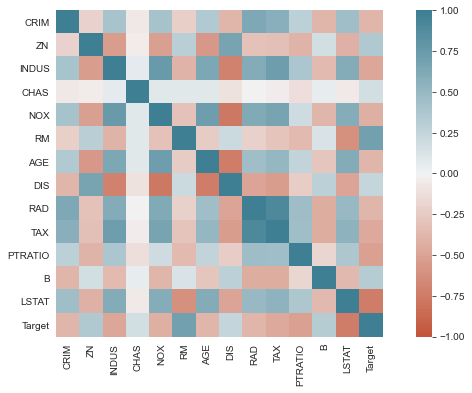

In [106]:
#correlation
plt.figure(figsize=(12,6))
sns.heatmap(data=df.corr(),vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=400),square=True)
plt.savefig('correlplot.png',bbox_inches='tight')
#rad-tax highly correlated

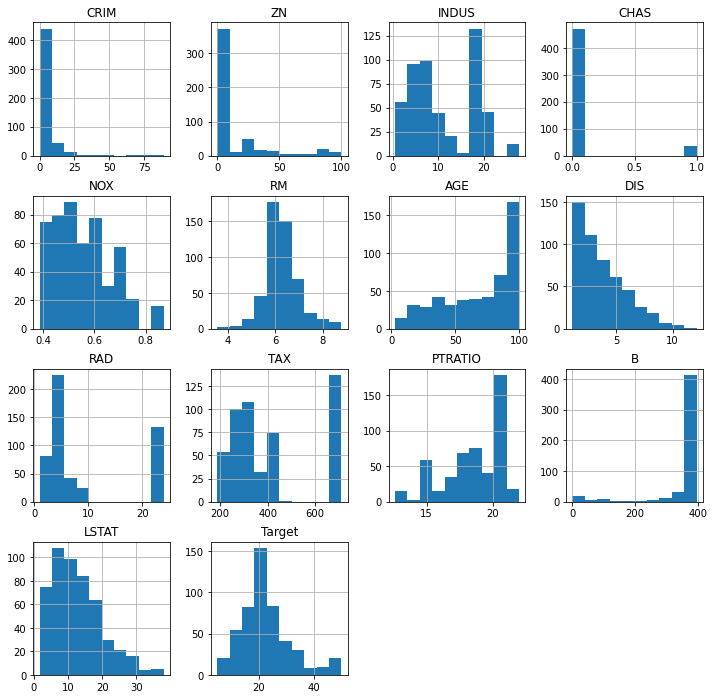

In [15]:
#unimodal data visualization
#add bell curves
df.hist(figsize=(12,12));

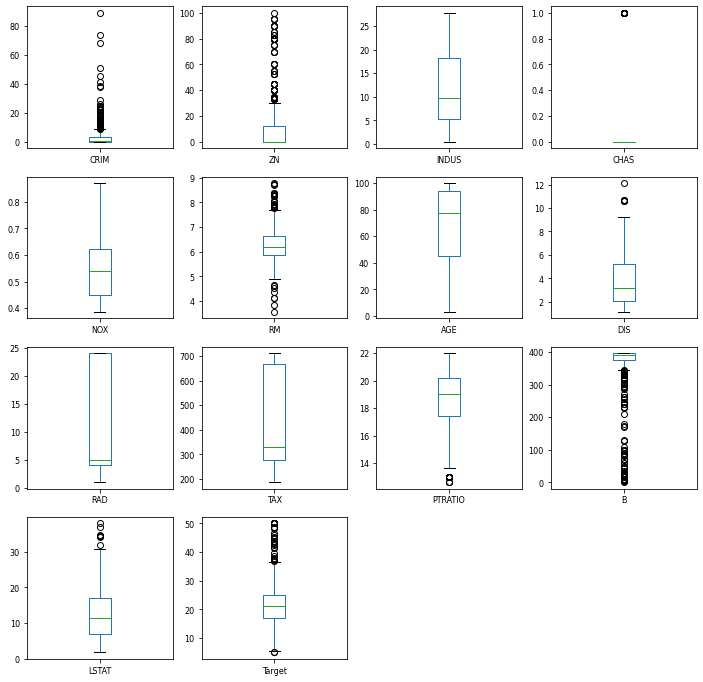

In [16]:
#box and whisker plots to identify extreme values
df.plot(kind='box',subplots=True,layout=(4,4),fontsize=8,figsize=(12,12));

C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


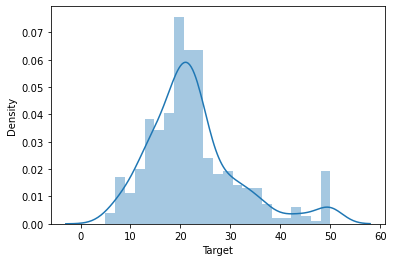

In [17]:
sns.distplot(df['Target']);

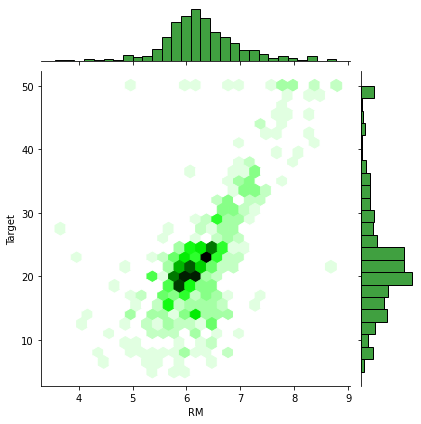

In [18]:
#between variables RM and the target variable
sns.jointplot(x='RM',y='Target',data=df,kind='hex',color='g')

In [19]:
sns.set_style('darkgrid')
#sns.pairplot(df,kind='reg');

In [20]:
#importing functions for linear regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [21]:
#dependent variable
df_y=pd.DataFrame(df.Target)
df_x=pd.DataFrame(boston_df.data,columns=boston_df.feature_names)

In [22]:
#initialising the linear regression model
reg=linear_model.LinearRegression()

In [23]:
#spliiting the data for train and test
#67% training and 33% testing
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.33,random_state=42)

In [24]:
#train the model with the training data
reg.fit(x_train,y_train)

LinearRegression()

In [25]:
#print the coefficients/weight for each feature of the model
print(reg.coef_)

[[-1.28749718e-01  3.78232228e-02  5.82109233e-02  3.23866812e+00
  -1.61698120e+01  3.90205116e+00 -1.28507825e-02 -1.42222430e+00
   2.34853915e-01 -8.21331947e-03 -9.28722459e-01  1.17695921e-02
  -5.47566338e-01]]


In [26]:
reg.intercept_

array([33.33497576])

In [27]:
#print the predictions on test dataset
y_pred=reg.predict(x_test)
print(y_pred)

[[28.53469469]
 [36.6187006 ]
 [15.63751079]
 [25.5014496 ]
 [18.7096734 ]
 [23.16471591]
 [17.31011035]
 [14.07736367]
 [23.01064388]
 [20.54223482]
 [24.91632351]
 [18.41098052]
 [-6.52079687]
 [21.83372604]
 [19.14903064]
 [26.0587322 ]
 [20.30232625]
 [ 5.74943567]
 [40.33137811]
 [17.45791446]
 [27.47486665]
 [30.2170757 ]
 [10.80555625]
 [23.87721728]
 [17.99492211]
 [16.02608791]
 [23.268288  ]
 [14.36825207]
 [22.38116971]
 [19.3092068 ]
 [22.17284576]
 [25.05925441]
 [25.13780726]
 [18.46730198]
 [16.60405712]
 [17.46564046]
 [30.71367733]
 [20.05106788]
 [23.9897768 ]
 [24.94322408]
 [13.97945355]
 [31.64706967]
 [42.48057206]
 [17.70042814]
 [26.92507869]
 [17.15897719]
 [13.68918087]
 [26.14924245]
 [20.2782306 ]
 [29.99003492]
 [21.21260347]
 [34.03649185]
 [15.41837553]
 [25.95781061]
 [39.13897274]
 [22.96118424]
 [18.80310558]
 [33.07865362]
 [24.74384155]
 [12.83640958]
 [22.41963398]
 [30.64804979]
 [31.59567111]
 [16.34088197]
 [20.9504304 ]
 [16.70145875]
 [20.23215

In [28]:
print(y_test)

     Target
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
..      ...
110    21.7
321    23.1
265    22.8
29     21.0
262    48.8

[167 rows x 1 columns]


In [29]:
from sklearn.metrics import mean_absolute_error
import math
print("Mean Absolude Error is {}".format( (mean_absolute_error(y_pred, y_test))))
print("Mean Squared Error is {}".format( math.sqrt(mean_absolute_error(y_pred, y_test))))

Mean Absolude Error is 3.1482557548168217
Mean Squared Error is 1.7743324814748846


In [30]:
#model performance/accuracy using MSE
print(np.mean((y_pred-y_test)**2))

Target    20.724023
dtype: float64


In [31]:
#from sklearn metrics MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

20.72402343733974


In [32]:
##Different part# creating a copy of the original dataset
#df_copy=df.copy()

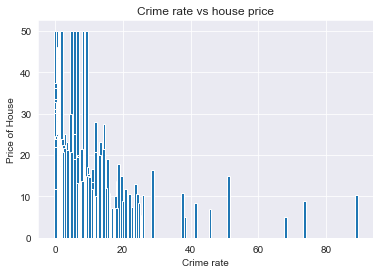

In [33]:
#plot
#as crime rate increases housing prices decreases
plt.bar(df.CRIM,df.Target)
plt.xlabel('Crime rate')
plt.ylabel('Price of House')
plt.title('Crime rate vs house price')
plt.show()

In [34]:
#replacing 0 by NaN
#df_copy.ZN.replace(0,np.nan,inplace=True)
#df_copy.CHAS.replace(0,np.nan,inplace=True)

In [35]:
#no of 0 values in CHAS > 50% of dataset
df['CHAS'].value_counts(dropna=False)

0.0    471
1.0     35
Name: CHAS, dtype: int64

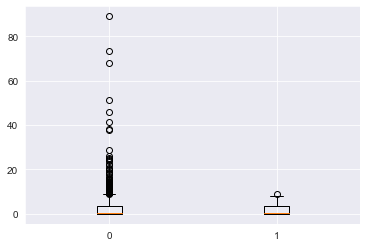

In [36]:
#boxplots of CHAS vs CRIM
char1=df.loc[df['CHAS']==0,'CRIM'].values
char2=df.loc[df['CHAS']==1,'CRIM'].values
plt.boxplot([char1,char2],labels=['0','1']);

In [37]:
##feature engineering #codebasics video
reg_1=linear_model.LinearRegression()
reg_1.fit(df_x,df_y)

LinearRegression()

In [38]:
#coefficients
reg_1.coef_

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [39]:
reg_1.intercept_

array([36.45948839])

In [40]:
#house price with certain features
#price will be 32
reg_1.predict([[0.05,18,1.5,1,0.7,5.5,40,2,1,150,15.3,400,3]])

array([[31.63063982]])

In [41]:
#score of normal linear regression analysis
reg_1.score(df_x,df_y)

0.7406426641094095

## PART 2:  TRAINING DATASET, USING SPLIT-TRAIN METHOD

In [42]:
##train,test again code basics
## training dataset: 80%; test dataset:20%
X_train,X_test,Y_train,Y_test=train_test_split(df_x,df_y,test_size=0.2)

In [43]:
#80% of sample
len(X_train)

404

In [44]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

In [45]:
#fitting the trained dataset
clf.fit(X_train,Y_train)

LinearRegression()

In [46]:
#predicting on test dataset
clf.predict(X_test)

array([[19.24902952],
       [15.44961646],
       [31.14433005],
       [20.48494711],
       [23.75397714],
       [35.00319948],
       [32.70097945],
       [29.29302958],
       [32.26294453],
       [32.96428839],
       [16.80264044],
       [18.68687125],
       [19.7725633 ],
       [ 7.88239154],
       [-0.14186251],
       [19.24487464],
       [19.49474419],
       [32.27545285],
       [22.83000638],
       [13.81753042],
       [25.38074258],
       [32.96588248],
       [43.36849585],
       [36.67822818],
       [20.40286459],
       [39.04556567],
       [20.65213387],
       [22.5862574 ],
       [24.08577447],
       [37.60147007],
       [32.12694209],
       [25.44519454],
       [15.69067507],
       [25.84988934],
       [16.99107283],
       [11.10679273],
       [24.42943677],
       [18.94493883],
       [15.93686745],
       [24.55339548],
       [23.27572385],
       [20.64109867],
       [25.72228836],
       [20.04307977],
       [19.01483971],
       [11

In [47]:
Y_test.sample(5)

,Target
126,15.7
6,22.9
257,50.0
241,20.1
119,19.3


In [48]:
# Scoring of testing dataset
clf.score(X_test,Y_test)

0.6436127317363878

In [49]:
#scoring of training dataset
clf.score(X_train,Y_train)

0.7600567137580339

## ANOVA, T-TEST STATISTICAL METHODS:

In [50]:
#anova test, t-test etc
import scipy.stats as stats
stats.f_oneway(df['CRIM'],df['TAX'])

F_onewayResult(statistic=2908.922419504142, pvalue=1.2513178592578005e-299)

In [51]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model=ols('DIS~RAD',data=df).fit()
anova_result=sm.stats.anova_lm(model,typ=2)
print(anova_result)

               sum_sq     df           F        PR(>F)
RAD        547.741411    1.0  163.211397  1.418269e-32
Residual  1691.436234  504.0         NaN           NaN


## PART 3: FEATURE ENGINEERING PART I

In [52]:
#creating copy of dataset
df_copy=df.copy()

In [53]:
#replacing 0 by NaN
df_copy.ZN.replace(0,np.nan,inplace=True)
df_copy.CHAS.replace(0,np.nan,inplace=True)

In [54]:
df_copy.isnull().sum()

CRIM         0
ZN         372
INDUS        0
CHAS       471
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
Target       0
dtype: int64

<AxesSubplot:>

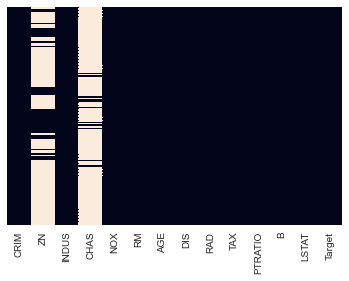

In [55]:
#to check which values are missing
sns.heatmap(df_copy.isnull(),yticklabels=False,cbar=False)

In [56]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       134 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     35 non-null     float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [57]:
#dropping columns of CHAS and ZN > 50% dataset filled with 0 values
df_copy.drop(['CHAS','ZN'],axis=1,inplace=True)

In [58]:
# new dataset
print(df_copy.shape)

(506, 12)


In [59]:
# another new copy of dataset for target variable
df_1=df_copy.copy()

In [60]:
df_copy.drop(['Target'],axis=1,inplace=True)

In [61]:
#training datasets after dropping CHAS, ZN
df_y1=pd.DataFrame(df_1.Target)
df_x1=pd.DataFrame(df_copy)

In [62]:
reg_2=linear_model.LinearRegression()
reg_2.fit(df_x1,df_y1)

LinearRegression()

In [63]:
##train,test again code basics after dropping CHAS and ZN
X1_train,X1_test,Y1_train,Y1_test=train_test_split(df_x1,df_y1,test_size=0.3)

In [64]:
len(X1_train)

354

## USING SKLEARN FOR Linear Regression analysis

In [65]:
from sklearn.linear_model import LinearRegression
clf1=LinearRegression()

In [66]:
#fitting the trained dataset
clf1.fit(X1_train,Y1_train)

LinearRegression()

In [67]:
test_score=clf1.score(X1_test,Y1_test)*100

In [68]:
print("Accuracy on test data: {:,.1f}%".format(test_score))

Accuracy on test data: 66.5%


In [69]:
train_score=clf1.score(X1_train,Y1_train)*100

In [70]:
print("Accuracy on train data: {:,.3f}%".format(train_score))

Accuracy on train data: 74.497%


### CHECKING FOR OUTLIERS USING PERCENTILE METHOD: CRIME COLUMN

In [71]:
#using quantile to reduce outliers, this is for max
max_threshold=df_copy['CRIM'].quantile(0.95)
max_threshold

15.78915

In [72]:
df_copy[df_copy['CRIM']>max_threshold].sample(4)

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
417,25.9406,18.1,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64
410,51.1358,18.1,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
387,22.5971,18.1,0.700,5.000,89.5,1.5184,24.0,666.0,20.2,396.90,31.99
380,88.9762,18.1,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21


In [73]:
#minimum threshold
min_threshold=df_copy['CRIM'].quantile(0.05)
min_threshold

0.027909999999999997

In [74]:
#new dataset having all crime values removed >95% and lower than 5%
df2=df_copy[(df_copy['CRIM']>min_threshold) & (df_copy['CRIM']<max_threshold)]

In [75]:
#q1=df_copy.AGE.quantile(0.25)
#q3=df_copy.AGE.quantile(0.75)
#q1,q3

In [76]:
#iqr=q3-q1
#iqr

In [77]:
#lower_limit=q1-(1.5*iqr)
#upper_limit=q3+(1.5*iqr)
#lower_limit, upper_limit

## PART 3: MULTIPLE REGRESSION AFTER REMOVING OUTLIERS (IQR TECHNIQUE)

### STEP 1>FEATURE ENGINEERING: REMOVING OUTLIERS FROM ALL VARIABLES
### STEP 2> MULTIPLE REGRESSION

In [78]:
#function to show boxplots 
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show

In [79]:
#creating copy of dataset
df_copy1=df.copy()

In [80]:
#replacing 0 by NaN
df_copy1.ZN.replace(0,np.nan,inplace=True)
df_copy1.CHAS.replace(0,np.nan,inplace=True)

In [81]:
df_copy1.drop(['CHAS','ZN'],axis=1,inplace=True)

In [82]:
df_copy1.shape

(506, 12)

In [83]:
#function to detect outliers from all columns
def outliers(df,ft):
    q1=df[ft].quantile(0.25)
    q3=df[ft].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1- 1.5*iqr
    upper_bound=q3+ 1.5*iqr
    ls=df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
    return ls

In [84]:
#creating an empty list to store output indices from multiple columns
index_list=[]
for feature in['CRIM','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']:
    index_list.extend(outliers(df_copy1,feature))

In [85]:
#function to drop all rows which have outliers 
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [86]:
df_cleaned=remove(df_copy1,index_list)

In [87]:
df_cleaned.shape

(353, 12)

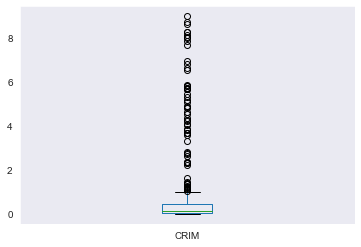

In [88]:
#considerable reduction in outliers 
plot_boxplot(df_cleaned,'CRIM')

In [89]:
#distribution
def plot_compare(df,var):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    sns.kdeplot(df[var],color='r',shade=True)
    lines,labels=ax.get_legend_handles_labels()
    ax.legend(lines,labels,loc='upper left')
    plt.grid(False)
    plt.show()

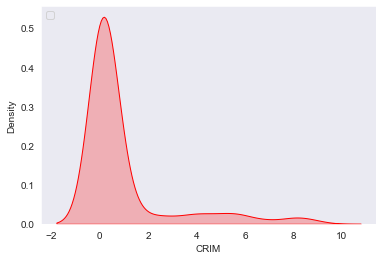

In [90]:
#outliers have been reduced by much
plot_compare(df_cleaned,'CRIM')

In [91]:
# new dataset for target variable
df_cleaned_1=df_cleaned.copy()

In [92]:
df_cleaned.drop(['Target'],axis=1,inplace=True)

In [93]:
#training after dropping CHAS, ZN
df_y2=pd.DataFrame(df_cleaned_1.Target)
df_x2=pd.DataFrame(df_cleaned)

In [94]:
##train,test again code basics after dropping CHAS and ZN
X2_train,X2_test,Y2_train,Y2_test=train_test_split(df_x2,df_y2,test_size=0.33,random_state=1)

In [95]:
from sklearn.linear_model import LinearRegression
clf2=LinearRegression()

In [96]:
#fitting the trained dataset
clf2.fit(X2_test,Y2_test)

LinearRegression()

In [97]:
# test dataset score
clf2.score(X2_test,Y2_test)

0.7401233091812496

In [98]:
clf2.fit(X2_train,Y2_train)

LinearRegression()

In [99]:
#train dataset score
clf2.score(X2_train,Y2_train)

0.618555976880955

In [100]:
['CRIM','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

['CRIM',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [101]:
cols1 = df_copy1[['CRIM','INDUS','NOX']].columns.tolist()
cols2 = df_copy1[['RM','AGE','DIS']].columns.tolist()
cols3 = df_copy1[['RAD','TAX','PTRATIO']].columns.tolist()
cols4 = df_copy1[['B','LSTAT']]

In [102]:
#plotting for both histogram and boxplot
def plotvariable1(df,variable):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.hist(df[variable],alpha=0.5)
    plt.title('Dist. of CRIME')
    
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[variable])
    plt.show()

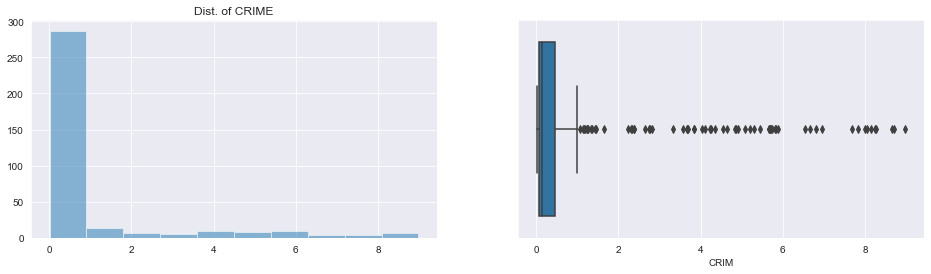

In [103]:
import warnings
warnings.filterwarnings('ignore')
plotvariable1(df_cleaned,'CRIM')

In [104]:
#function to detect outliers from all columns
def outliers1(df,ft):
    q1=df[ft].quantile(0.25)
    q3=df[ft].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1- 1.5*iqr
    upper_bound=q3+ 1.5*iqr
    return lower_bound,upper_bound

In [105]:
lower_crime,upper_crime=outliers1(df_copy,'CRIM')
print("upper limit:",upper_crime)
print("lower limit:",lower_crime)

upper limit: 9.06963875
lower limit: -5.31051125
